In [22]:
#   Write a program to calculate Fibonacci numbers and find its step count. 

def FibItr(n):
    if n <= 1:
        return n, 1
    else:
        a, b = 0, 1
        steps = 1
        for _ in range(2, n + 1):
            a, b = b, a + b
            steps += 1
        return b, steps

def FibRec(n):
    if n <= 1:
        return n, 1
    else:
        a, steps_a = FibRec(n - 1)
        b, steps_b = FibRec(n - 2)
        return a + b, steps_a + steps_b + 1

# Main function
def main():
    n = int(input("Enter the Fibonacci number (n): "))
    choice = input("Choose method - Iterative (I) or Recursive (R): ").strip().lower()

    if choice == 'i':
        result, steps = FibItr(n)
    elif choice == 'r':
        result, steps = FibRec(n)
    else:
        print("Invalid choice!")
        return
    
    print(f"Fibonacci({n}) = {result}, Steps = {steps}")

# Call the main function
main()


Enter the Fibonacci number (n): 5
Choose method - Iterative (I) or Recursive (R): r
Fibonacci(5) = 5, Steps = 15


In [20]:
#  Implement job sequencing with deadlines using a greedy method. 

class job:
    def __init__(self, job_id, deadline, profit):
        self.job_id = job_id
        self.deadline = deadline
        self.profit =profit
        
    def job_sequence(jobs):
        max_deadline = 0;
        
        for job in jobs:
            if job.deadline > max_deadline:
                max_deadline = job.deadline
                
        jobs.sort(key = lambda x:x.profit, reverse=True)
        
        result = [None] * max_deadline
        max_profit = 0
        
        for job in jobs:
            for j in range(max(max_deadline,job.deadline)-1,-1,-1):
                if result[j] is None:
                    result[j] = job.job_id
                    max_profit += job.profit
                    break
                    
        print("scheduled Jobs :", end=" ")
        for job_id in result:
            if job_id is not None:
                print(job_id, end=" ")
        print(f"\n Total Profit = {max_profit}")
                
        
    jobs = [
        Job("J1", 2, 100),
        Job("J2", 1, 50),
        Job("J3", 2, 10),
        Job("J4", 1, 20),
        Job("J5", 3, 30)
    ]

    job_sequence(jobs)

scheduled Jobs : J5 J2 J1 
 Total Profit = 180


In [24]:
#  Write a program to solve a fractional Knapsack problem using a greedy method.

# Class to represent an item with weight, value, and value-to-weight ratio
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight
        self.ratio = value / weight  # Value-to-weight ratio

def fractional_knapsack(capacity, items):
    # Sort items based on the value-to-weight ratio in descending order
    items.sort(key=lambda x: x.ratio, reverse=True)

    total_value = 0  # To store the maximum value in the knapsack
    for item in items:
        if capacity == 0:  # If the knapsack is full
            break
        
        # If the item can fit completely into the knapsack
        if item.weight <= capacity:
            total_value += item.value
            capacity -= item.weight
        else:
            # Take the fraction of the item that fits
            total_value += item.value * (capacity / item.weight)
            capacity = 0  # The knapsack is now full

    return total_value

# Example usage:
items = [
    Item(60, 10),  # Value = 60, Weight = 10
    Item(100, 20),  # Value = 100, Weight = 20
    Item(120, 30)   # Value = 120, Weight = 30
]

capacity = 50  # Maximum capacity of the knapsack

max_value = fractional_knapsack(capacity, items)
print(f"Maximum value in the knapsack = {max_value}")


Maximum value in the knapsack = 240.0


In [25]:
# Write a program to solve a 0-1 Knapsack problem using dynamic programming or branch and bound strategy.

# Function to solve the 0-1 Knapsack problem using dynamic programming
def knapsack_01(weights, values, capacity):
    n = len(weights)  # Number of items
    
    # Create a 2D DP table to store the maximum value at each n, w
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    
    # Build the DP table
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:  # If the current item can fit
                # Take the maximum of including or excluding the current item
                dp[i][w] = max(dp[i - 1][w], values[i - 1] + dp[i - 1][w - weights[i - 1]])
            else:
                # Exclude the current item
                dp[i][w] = dp[i - 1][w]
    
    # The value at dp[n][capacity] contains the maximum value that can be obtained
    return dp[n][capacity]

# Example usage:
weights = [2, 3, 4, 5]  # Weights of the items
values = [3, 4, 5, 6]   # Values of the items
capacity = 5            # Capacity of the knapsack

max_value = knapsack_01(weights, values, capacity)
print(f"Maximum value that can be obtained = {max_value}")


Maximum value that can be obtained = 7


In [26]:
# Machine Learning

In [ ]:
# uber

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [35]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [38]:
df.dropna(how='any', inplace = True)

In [39]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

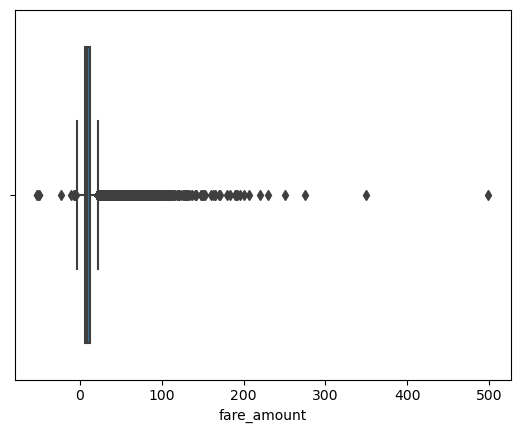

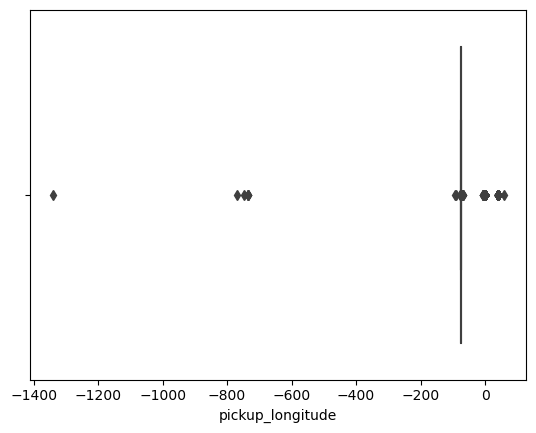

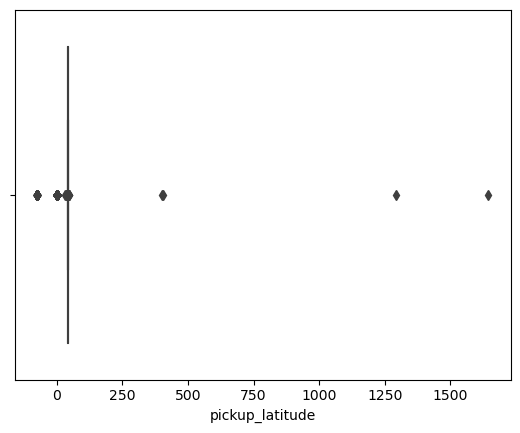

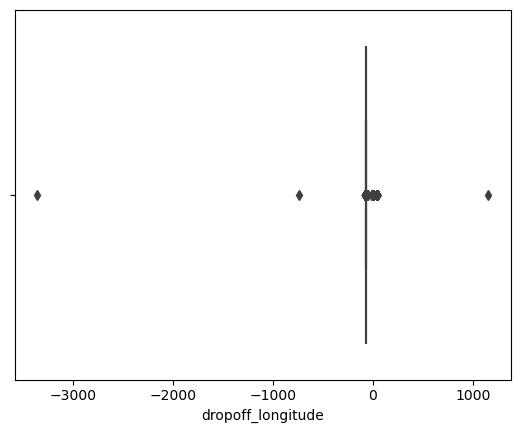

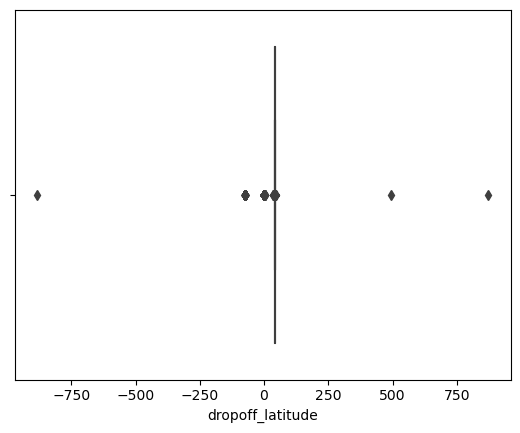

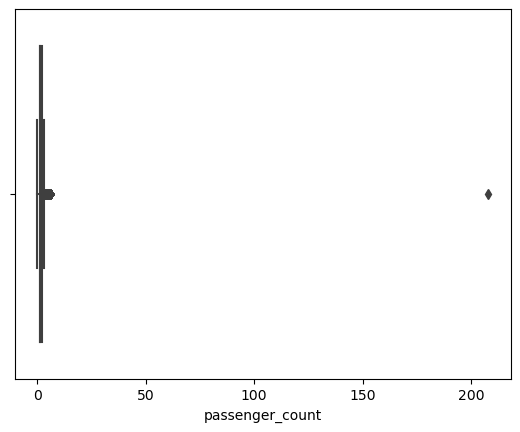

In [40]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df,x=col)

In [41]:
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) &
    (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180) &
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) & 
    (df.fare_amount > 0) & (df.passenger_count > 0)  & (df.passenger_count < 50)
]

In [42]:
from math import cos, asin, sqrt, pi
import numpy as np

def distance(lat_1,lon_1,lat_2,lon_2):
#     lat1 = row.pickup_latitude
#     lon1 = row.pickup_longitude
#     lat2 = row.dropoff_latitude
#     lon2 = row.dropoff_longitude
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [43]:
temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
4    4.475450
dtype: float64

In [44]:
df_new = df.copy()
df_new['Distance'] = temp
df = df_new
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


<Axes: xlabel='Distance'>

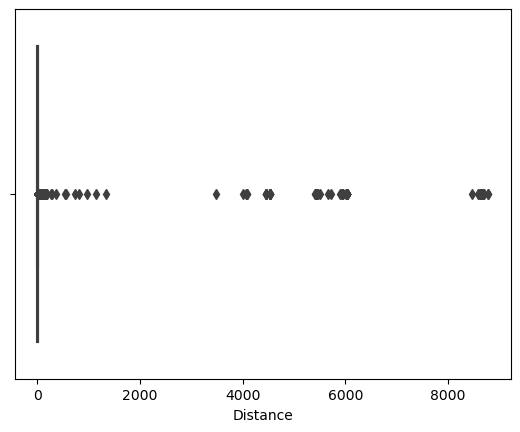

In [45]:
sns.boxplot(data=df,x='Distance')

In [46]:
df = df[(df['Distance'] < 200) & (df['Distance'] > 0)]

In [47]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

C:\Users\admin\AppData\Local\Temp\ipykernel_19912\1295461447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [48]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour

C:\Users\admin\AppData\Local\Temp\ipykernel_19912\2592915223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = df['pickup_datetime'].dt.day_name()
C:\Users\admin\AppData\Local\Temp\ipykernel_19912\2592915223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['pickup_datetime'].dt.year
C:\Users\admin\AppData\Local\Temp\ipykernel_19912\2592915223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [49]:
df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_19912\3782303944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)


In [50]:
df.head()

,fare_amount,passenger_count,Distance,week_day,Year,Month,Hour
0,7.5,1,1.683323,Thursday,2015,5,19
1,7.7,1,2.457590,Friday,2009,7,20
2,12.9,1,5.036377,Monday,2009,8,21
3,5.3,3,1.661683,Friday,2009,6,8
4,16.0,5,4.475450,Thursday,2014,8,17


In [51]:
temp = df.copy()

def convert_week_day(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday']:
        return 0 # Weekday
    return 1 # Weekend

def convert_hour(hour):
    if 5 <= hour <= 12:
        return 1
    elif 12 < hour <= 17:
        return 2
    elif 17 < hour < 24:
        return 3
    return 0

df['week_day'] = temp['week_day'].apply(convert_week_day)
df['Hour'] = temp['Hour'].apply(convert_hour)
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_19912\619704178.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = temp['week_day'].apply(convert_week_day)
C:\Users\admin\AppData\Local\Temp\ipykernel_19912\619704178.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = temp['Hour'].apply(convert_hour)


,fare_amount,passenger_count,Distance,week_day,Year,Month,Hour
0,7.5,1,1.683323,0,2015,5,3
1,7.7,1,2.457590,1,2009,7,3
2,12.9,1,5.036377,0,2009,8,3
3,5.3,3,1.661683,1,2009,6,1
4,16.0,5,4.475450,0,2014,8,2


In [52]:
df.corr()

,fare_amount,passenger_count,Distance,week_day,Year,Month,Hour
fare_amount,1.000000,0.011884,0.778667,0.002305,0.120430,0.024120,-0.021078
passenger_count,0.011884,1.000000,0.005112,0.035882,0.005339,0.008818,0.013572
Distance,0.778667,0.005112,1.000000,0.014518,0.018617,0.007373,-0.022691
week_day,0.002305,0.035882,0.014518,1.000000,0.006910,-0.007328,-0.078129
Year,0.120430,0.005339,0.018617,0.006910,1.000000,-0.115182,0.001131
Month,0.024120,0.008818,0.007373,-0.007328,-0.115182,1.000000,-0.005410
Hour,-0.021078,0.013572,-0.022691,-0.078129,0.001131,-0.005410,1.000000


<Axes: xlabel='Distance', ylabel='fare_amount'>

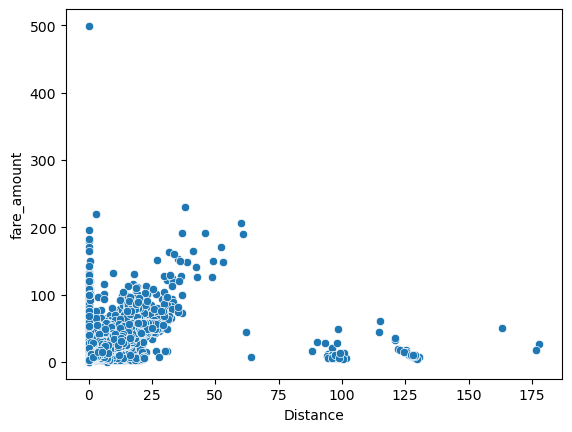

In [53]:
sns.scatterplot(y=df['fare_amount'],x=df['Distance'])

In [54]:
from sklearn.preprocessing import StandardScaler
x = df[['Distance']].values
y = df['fare_amount'].values.reshape(-1,1)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [56]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)

In [57]:
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.transform(y_test)

In [58]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    MAE = mean_absolute_error(y_test,y_pred)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    print("MAE:  ",MAE)
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

R-squared:  0.604116792084117
RMSE:  0.6290054895695945
MAE:   0.27552329590959845


In [59]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

R-squared:  0.6515202458414774
RMSE:  0.590146276316719
MAE:   0.2916749344186238


In [60]:
# Email 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [64]:
df.dropna(how='any',inplace=True)

In [65]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,precision_score,recall_score,plot_precision_recall_curve,plot_roc_curve
def report(classifier):
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    display = ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
    display.plot()
    print(f"Accuracy:  {accuracy_score(y_test,y_pred)}")
    print(f"Precision Score:  {precision_score(y_test,y_pred)}")
    print(f"Recall Score:  {recall_score(y_test,y_pred)}")
    plot_precision_recall_curve(classifier,x_test,y_test)
    plot_roc_curve(classifier,x_test,y_test)


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

processing...,it will take some time


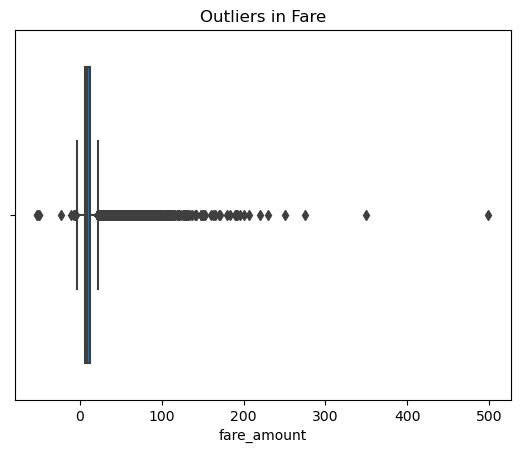

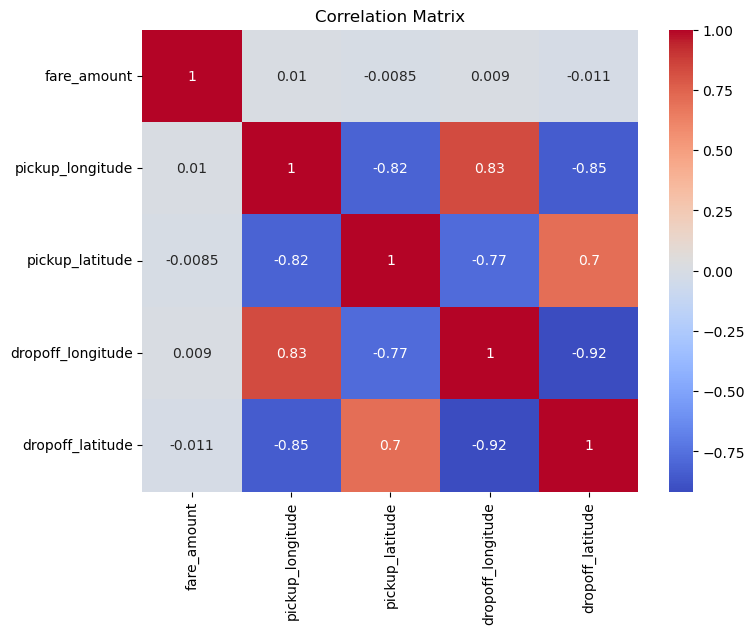

Linear Regression - RMSE: 10.198052151911462, R2: 0.00022750930958048698
Random Forest - RMSE: 5.577689929010011, R2: 0.7009282026161571


In [4]:
#for final output it takes time when you use VScode 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset and drop irrelevant columns
data = pd.read_csv('./dataset/uber.csv')
data.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime', 'passenger_count'], inplace=True)  # Remove unnecessary columns

print('processing...,it will take some time')

# Drop rows with missing values
data.dropna(inplace=True)

# Step 2: Identify and visualize outliers in 'fare_amount'
sns.boxplot(x=data['fare_amount'])
plt.title('Outliers in Fare')
plt.show()

# Step 3: Check correlations (numeric columns only)
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Step 4: Prepare data for model training
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = data['fare_amount']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Train Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Step 5: Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Linear Regression Model
lr_rmse, lr_r2 = evaluate_model(y_test, lr_pred)
print(f"Linear Regression - RMSE: {lr_rmse}, R2: {lr_r2}")

# Evaluate Random Forest Model
rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred)
print(f"Random Forest - RMSE: {rf_rmse}, R2: {rf_r2}")


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the dataset
url = "uber."
data = pd.read_csv(url)
data.dropna(inplace=True)

# Split data
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Random Forest Model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate models
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2
